In [1]:
import pandas as pd 
import numpy as np  #For mathematical calculatons
import seaborn as sns #For data visualization
import matplotlib.pyplot as plt # For plotting graphs
import warnings      #To ignore warnings
warnings.filterwarnings ("ignore")

In [2]:
df=pd.read_csv("winequality-red.csv") #We loaded the data into the dataframe.

In [3]:
df.head() # to display the data so we can form an idea.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
from statsmodels.formula.api import ols
#We realise that the names of some columns are abit confusing ,so i decided to rename those variables and add an "_" between them.
df.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'},inplace=True)

In [5]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
model = ols("quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide	+ density + pH + sulphates + alcohol   ", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sun, 10 Jan 2021   Prob (F-statistic):          1.79e-145
Time:                        08:03:18   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.9652 

In [7]:
#We're going to remove some features who showed relatively high p values
#-fixed acidity
#-citric acid
#-residual sugar
#-density

In [23]:
model = ols("quality ~  volatile_acidity +chlorides + free_sulfur_dioxide + total_sulfur_dioxide + sulphates + pH + alcohol  ", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     127.6
Date:                Sun, 10 Jan 2021   Prob (F-statistic):          5.32e-149
Time:                        08:08:04   Log-Likelihood:                -1570.5
No. Observations:                1599   AIC:                             3157.
Df Residuals:                    1591   BIC:                             3200.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.4301 

In [20]:
model = ols("quality ~  volatile_acidity + chlorides + free_sulfur_dioxide+total_sulfur_dioxide   +sulphates + pH + alcohol+total_sulfur_dioxide*sulphates + sulphates*alcohol  ", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     109.6
Date:                Sun, 10 Jan 2021   Prob (F-statistic):          1.15e-159
Time:                        08:06:41   Log-Likelihood:                -1540.7
No. Observations:                1599   AIC:                             3101.
Df Residuals:                    1589   BIC:                             3155.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

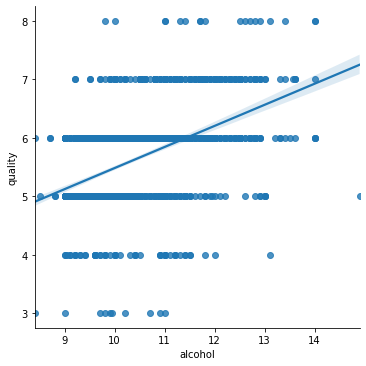

In [26]:

sns.lmplot(y='quality', x='alcohol',  data=df)
